# Workshop 11 <hr/>

## Importing the libraries





In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az



## Generating The Data

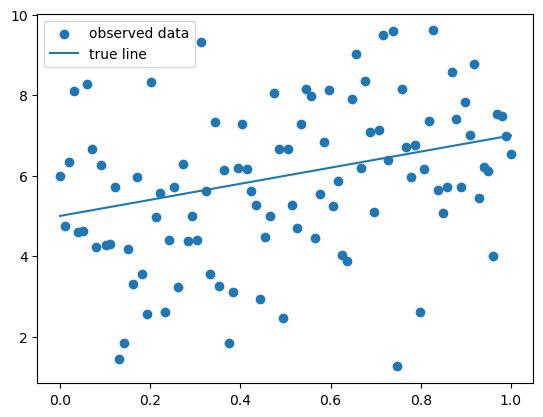

In [3]:
np.random.seed(42)
true_slope=2
true_intercept=5

x=np.linspace(0,1,100)
y_true=true_slope*x+true_intercept
y_observed=y_true+np.random.normal(scale=2,size=len(x))

plt.scatter(x,y_observed,label='observed data')
plt.plot(x,y_true,label='true line')
plt.legend()
plt.show()


## Defining The Model

In [10]:
with pm.Model() as model:
    slope=pm.Normal('slope',mu=0,sd=10)
    intercept=pm.Normal('intercept',mu=0,sd=10)

    likelihood=pm.Normal('y',mu=slope*x+intercept,sd=2,observed=y_observed)
    linear_trace=pm.sample(1000,tune=1000,cores=1)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


## Analyszing The Results

C:\Windows\Temp\ipykernel_13664\2920489211.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(linear_trace)


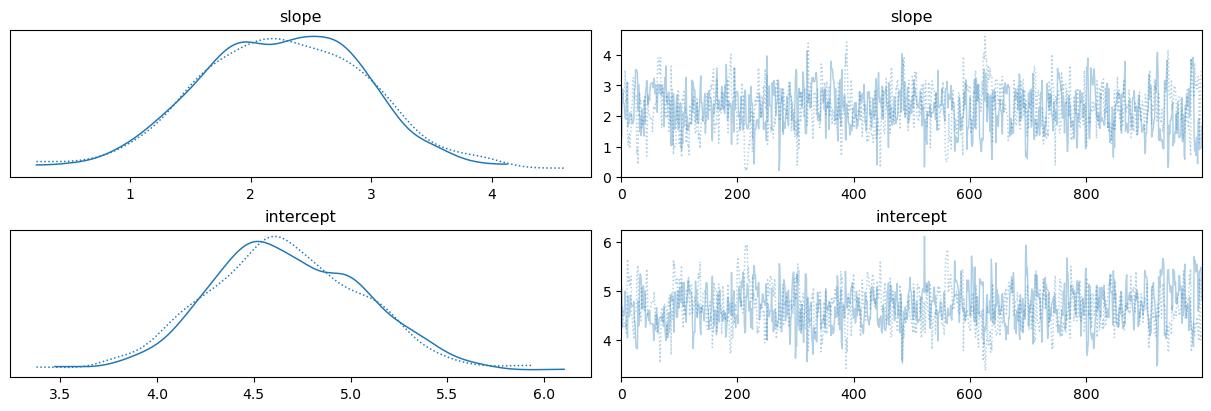

d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'slope'}>,
       <Axes: title={'center': 'intercept'}>], dtype=object)

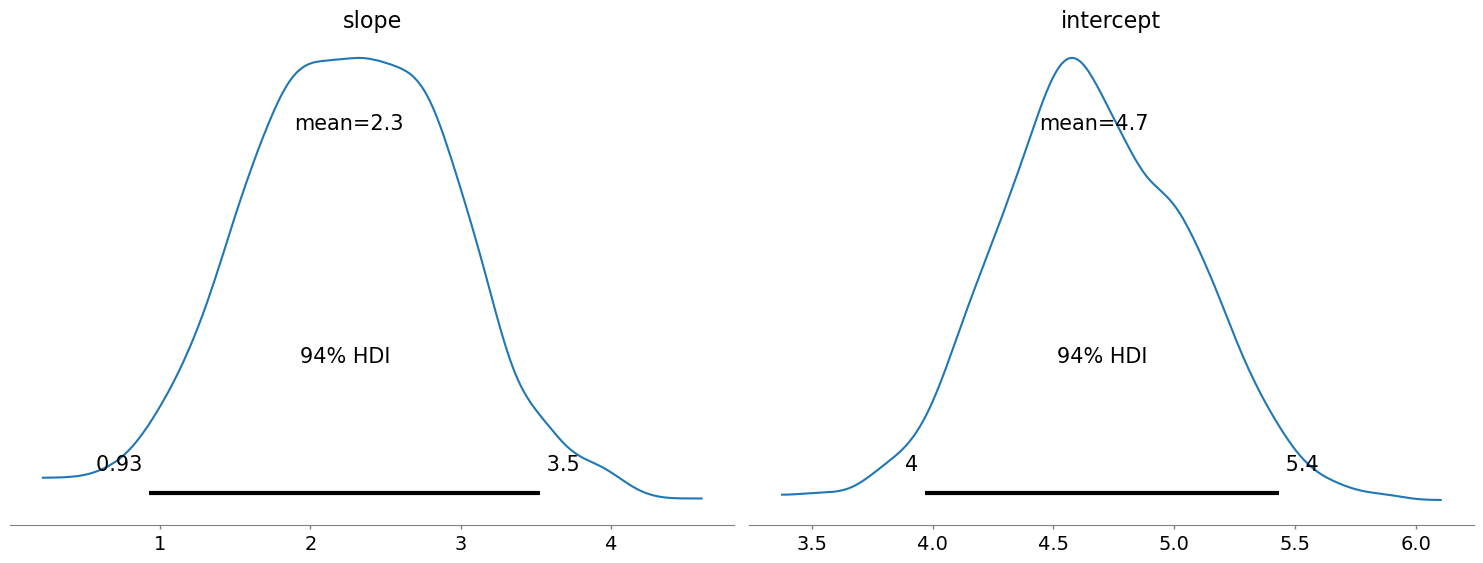

In [13]:
pm.traceplot(linear_trace)
plt.show()
pm.summary(linear_trace).round(2)
pm.plot_posterior(linear_trace)


d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [quad_term, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
C:\Windows\Temp\ipykernel_13664\240333685.py:13: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(quadratic_trace)
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


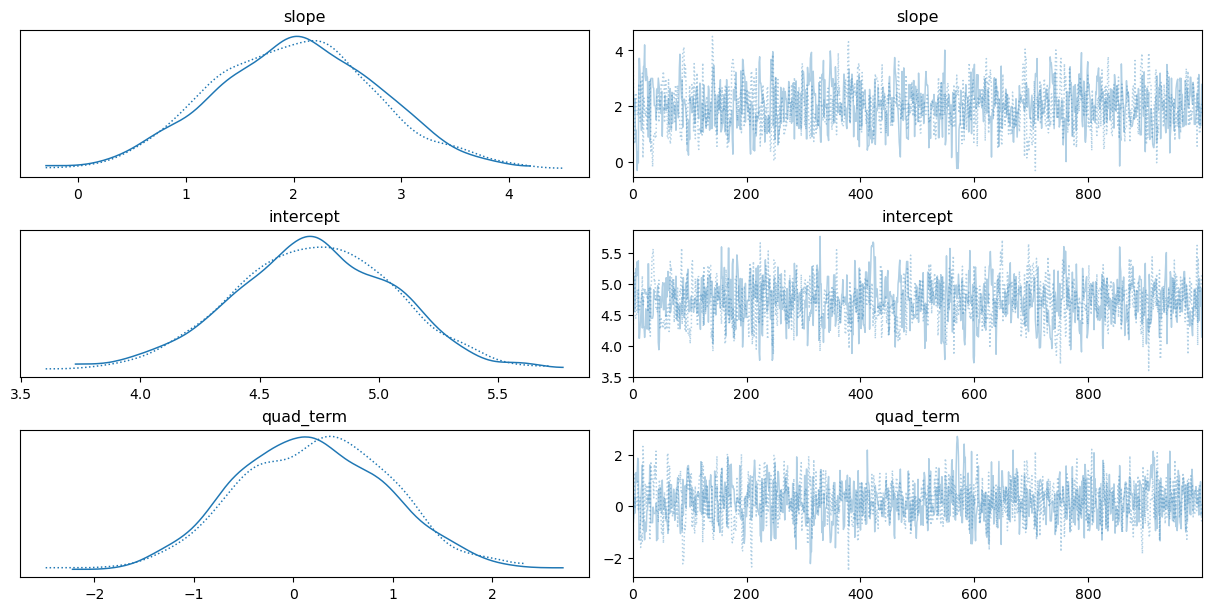

d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'slope'}>,
       <Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'quad_term'}>], dtype=object)

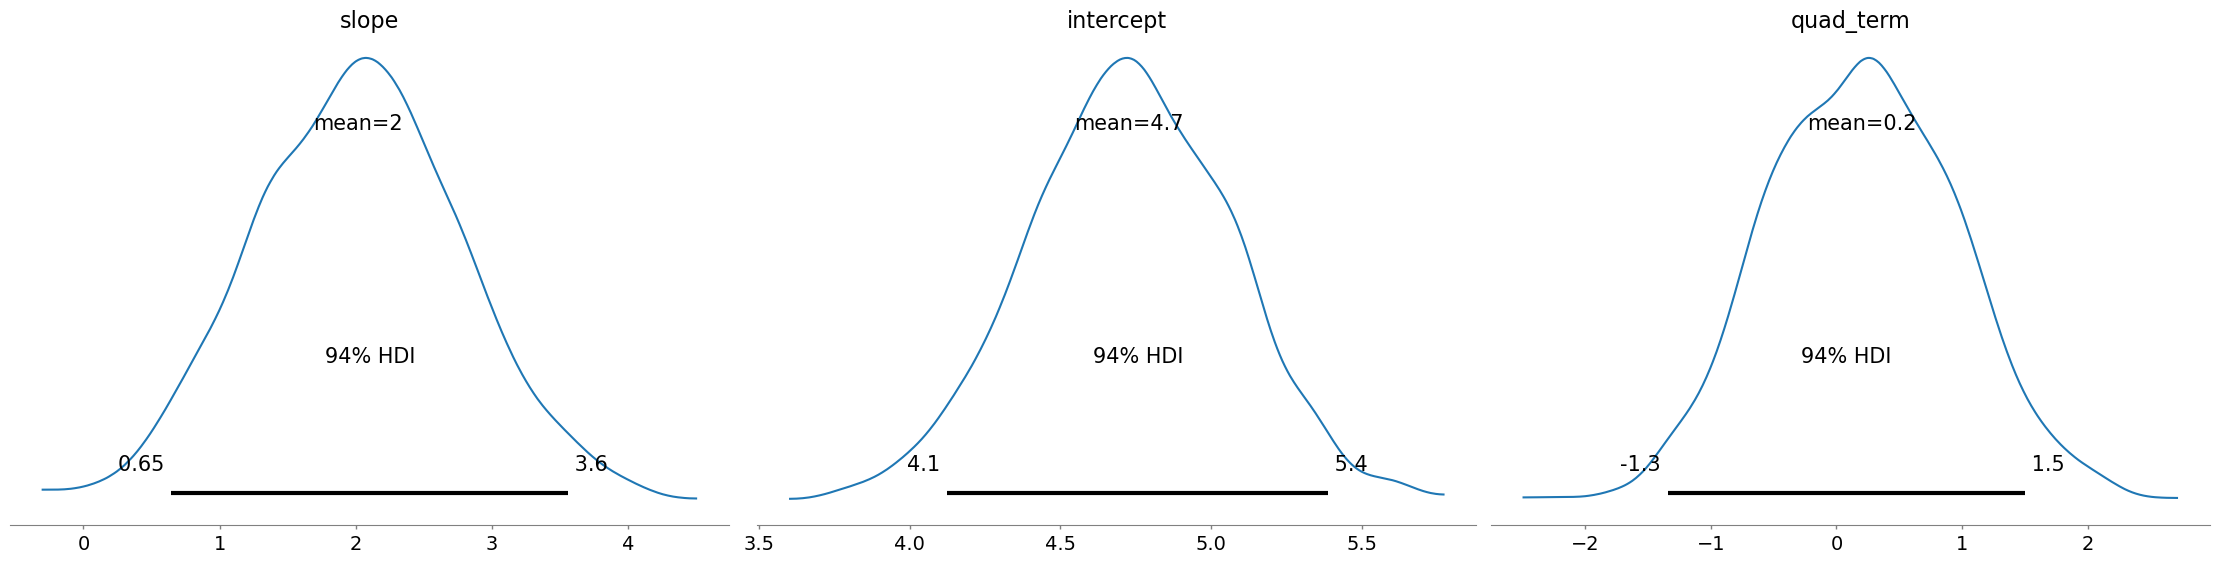

In [12]:
with pm.Model() as updated_model:
    # More informative priors
    slope = pm.Normal('slope', mu=2, sd=1)
    intercept = pm.Normal('intercept', mu=5, sd=1)
    
    # Quadratic term for more flexibility
    quad_term = pm.Normal('quad_term', mu=0, sd=1)

    # Adjusted model with quadratic term
    likelihood = pm.Normal('y', mu=slope * x + intercept + quad_term * x**2, sd=2, observed=y_observed)
    quadratic_trace = pm.sample(1000, tune=1000, cores=1)

pm.traceplot(quadratic_trace)
plt.show()
pm.summary(quadratic_trace).round(2)
pm.plot_posterior(quadratic_trace)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [power_5_term, intercept, slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
C:\Windows\Temp\ipykernel_13664\687673884.py:11: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(power_5_trace)
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


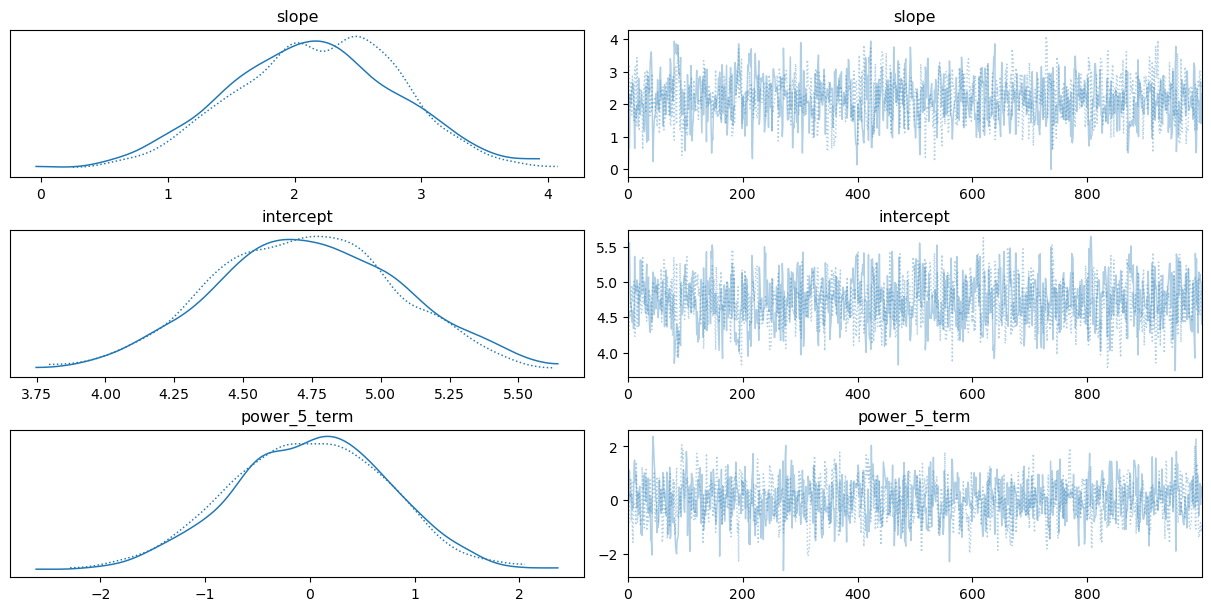

d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'slope'}>,
       <Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'power_5_term'}>], dtype=object)

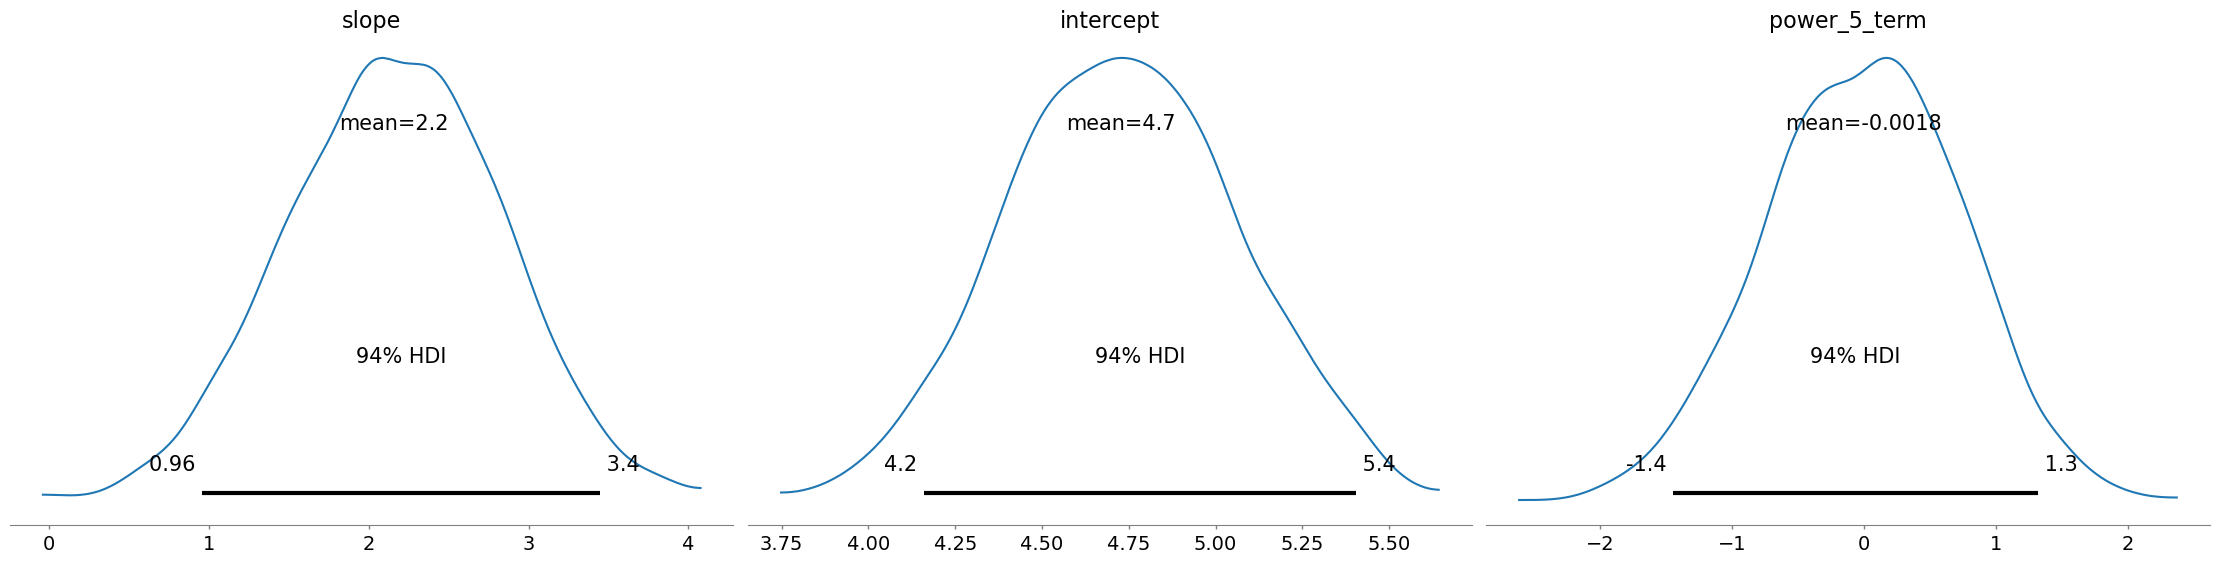

In [17]:
with pm.Model() as power_5_model:
    slope = pm.Normal('slope', mu=2, sd=1)
    intercept = pm.Normal('intercept', mu=5, sd=1)
    power_5_term = pm.Normal('power_5_term', mu=0, sd=1)
    
    # Include power 5 term
    likelihood = pm.Normal('y', mu=slope * x + intercept + power_5_term * x**5, sd=2, observed=y_observed)
    power_5_trace = pm.sample(1000, tune=1000, cores=1)

    
pm.traceplot(power_5_trace)
plt.show()
pm.summary(power_5_trace).round(2)
pm.plot_posterior(power_5_trace)

# Calculating WAIC

In [18]:
linear_waic = az.waic(linear_trace)
quadratic_waic = az.waic(quadratic_trace)
power_5_waic = az.waic(power_5_trace)

d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [21]:
# Compare WAIC
print("WAIC - Linear Model:", linear_waic.waic)
print("WAIC - Power 5 Model:", power_5_waic.waic)
print("WAIC - Quadratic Model:", quadratic_waic.waic)
print("Relative WAIC Difference:", linear_waic.waic - power_5_waic.waic)
print("Relative WAIC Difference:", linear_waic.waic - quadratic_waic.waic)
print("Relative WAIC Difference:", quadratic_waic.waic - power_5_waic.waic)

WAIC - Linear Model: -203.81479965875252
WAIC - Power 5 Model: -203.6647728033619
WAIC - Quadratic Model: -203.58975314105206
Relative WAIC Difference: -0.150026855390621
Relative WAIC Difference: -0.2250465177004628
Relative WAIC Difference: 0.0750196623098418


## Analyzing The Results

Comparing Models:

- The Power 5 Model has a WAIC of -203.66, which is better than the Linear Model (-203.81) but slightly worse than the Quadratic Model (-203.59).

- The Quadratic Model has a WAIC of -203.59, which is better than the Linear Model (-203.81) but slightly worse than the Power 5 Model (-203.66).

- The Linear Model has a WAIC of -203.81, which is worse than the Quadratic Model (-203.59) and the Power 5 Model (-203.66).

- The relative WAIC differences provide a comparison between models. The difference between the Power 5 and Quadratic Models is -0.15, indicating a modest preference for the Quadratic Model. The difference between the Quadratic and Linear Models is -0.23, suggesting a preference for the Quadratic Model over the Linear Model. The difference between the Power 5 and Linear Models is 0.075, suggesting a modest preference for the Power 5 Model over the Linear Model.

## Recommendations:

The introduction of the power-5 term in the model seems to improve the fit compared to the Linear Model, but it doesn't outperform the Quadratic Model. The choice between models should be made based on a combination of statistical metrics, model interpretability, and domain knowledge


Based on WAIC, the Quadratic Model is currently favored, but the difference between the models is not large. The decision may depend on the context of the analysis, the interpretability of the model, and the specific requirements of your problem.